# Import Library

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# State Transition Probability

In [4]:
# new_state, reward, state, action
state_transition_probability = np.zeros((12,4,3),dtype=int)+-1
state_transition_probability

diamond =10
fire = -10
# action: 0-left, 1-right, 2-up, 3-down

for state,_ in enumerate(state_transition_probability):

    
    
    for action,__ in enumerate(state_transition_probability[state]):
        state_transition_probability[state,:,2]=state
        
        if action==0:
            if state==0 or state==4 or state==6 or state==8 or state==3 or state==7 or state==5:
                state_transition_probability[state,action,0]=state_transition_probability[state,action,2]
            if state==1 or state==2 or state==9 or state==10 or state==11:
                state_transition_probability[state,action,0]=state_transition_probability[state,action,2]-1
            
         
            
            
        elif action==1:
            if state==0 or state==1 or state==2 or state==8 or state==9 or state==10 or state==6:
                state_transition_probability[state,action,0]=state_transition_probability[state,action,2]+1
            if state==3 or state==4 or state==11 or state==7 or state==5:
                state_transition_probability[state,action,0]=state_transition_probability[state,action,2]
            if state==2:
                state_transition_probability[state,action,1]=diamond
            elif state==6:
                state_transition_probability[state,action,1]=fire
                
        
        elif action==2:
            if state==0 or state==1 or state==2 or state==3 or state==5 or state==7 or state==9:
                state_transition_probability[state,action,0]=state_transition_probability[state,action,2]
            if state==4 or state==6 or state==8 or state==10 or state==11:
                state_transition_probability[state,action,0]=state_transition_probability[state,action,2]-4
            if state==11:
                state_transition_probability[state,action,1]=fire         
        else:
            if state==0 or state==2 or state==4 or state==6:
                state_transition_probability[state,action,0]=state_transition_probability[state,action,2]+4
            if state==1 or state==3 or state==5 or state==7 or state==8 or state==9 or state==10 or state==11:
                state_transition_probability[state,action,0]=state_transition_probability[state,action,2]
            
                


# Policy Evaluation and Policy Improvement

In [6]:
def policy_evaluation(gamma,theta,Value_function,policy,state_transition_probability,value_range=(-1e3, 1e3)):
    
    while True:
        delta = 0
        for state,_ in enumerate(state_transition_probability):
            v= V[state]
            if state==3 or state==7 or state==5:
                continue
            else:
                
                new_value=sum([
                    policy[state,action]*(new_state[1]+gamma*V[(new_state[0])]) for action, new_state in enumerate(state_transition_probability[state])
                ])
            # Clip the new value to avoid overflow
            new_value = np.clip(new_value, *value_range)
            V[state] =new_value
            delta=max(delta,abs(v-V[state]))
        if delta < theta:
            break
    
    return V

def policy_improvement(policy,gamma, value_function, state_transition_probability,num_states=12):
    policy_stable = True
    
    for state in range(num_states):
        
            
        old_action = np.argmax(policy[state])
        
        if state==3 or state==7 or state==5:
            continue
        else:
            

            best_value = np.argmax([
                policy[state,action]*(new_state[1]+ gamma*V[(new_state[0])])
                for action, new_state in enumerate(state_transition_probability[state])
            ])
            
        new_policy = np.zeros_like(policy[state])
        new_policy[best_value]=1
        policy[state] = new_policy
        #policy[state][best_value]=1

        if old_action != best_value:
            policy_stable = False
  
    return policy, policy_stable





# Initialize all the Parameters

In [8]:
num_states = 12
num_actions=4
gamma = 0.9
theta = 0.01
state_transition_probability
V = np.random.randn(12)*5
V[3]=0
V[5]=np.nan
V[7]=0
policy = np.ones((num_states,num_actions))/num_actions
policy[3]=policy[5]=policy[7]=0

In [9]:
policy_stable=False
i = 0
while not policy_stable:
    i+=1
    V = policy_evaluation(gamma,theta,V,policy,state_transition_probability)
    policy, policy_stable = policy_improvement(policy,gamma, V, state_transition_probability)

print('optimal policy is: ','\n', policy)
print('\n')
print('optimal action value is: ','\n', V)
print('\n')
print('stability:', policy_stable)

optimal policy is:  
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


optimal action value is:  
 [ 6.2    8.    10.     0.     4.58     nan  8.     0.     3.122  4.58
  6.2    4.58 ]


stability: True


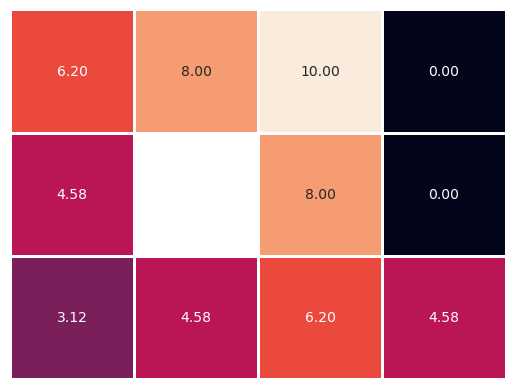

In [10]:
sns.heatmap(V.reshape(3,4), annot=True, lw=.9,fmt='.2f',xticklabels='',yticklabels='',cbar=None);